## TP4

### Exercice 1:

In [42]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1,1,3],[0,2,4],[0,0,4]])
b = np.array([1,2,4])
taille = 3

def remontee(A,b):
    x3 = b[2]/A[2][2]
    x2 = (b[1]-A[1][2]*x3)/A[1][1]
    x1 = (b[0]-(A[0][1]*x2+A[0][2]*x3))/A[0][0]
    return x1,x2,x3

print(remontee(A,b))

(-1.0, -1.0, 1.0)


### Exercice 2:

###### 1-

In [43]:
def inversible(A):
    if A is None:
        return False
    return (np.abs(np.linalg.det(A)) >= 10**-12)

def matTriangSup(taille):
    A = None
    while not(inversible(A)):
        A = np.triu(np.random.rand(taille,taille))
    return A

print(matTriangSup(taille))

[[0.05467106 0.61651422 0.0868437 ]
 [0.         0.7450479  0.72898787]
 [0.         0.         0.58218228]]


###### 2- 3-

In [44]:


def remonteeGen(A,b,taille):
    if inversible(A):
        x = np.zeros((taille))
        for i in range(taille-1, -1, -1):
            x[i] = b[i]
            for j in range(len(A)):
                x[i] -= A[i][j]*x[j] if j != i else 0
            x[i] /= A[i][i]
        return x
    else :
        raise np.linalg.LinAlgError("pas inversible")

x = remonteeGen(A,b,taille)
print(x)

[-1. -1.  1.]


###### 4-

In [45]:
def normeResidu(A,x,b):
    return max(np.abs(A@x - b))


print(normeResidu(A,x,b))

0.0


#### Exercice 3

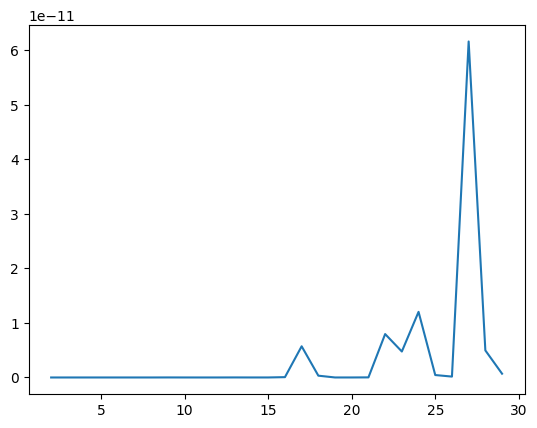

In [2]:
y = []
for i in range(2,30):
    d = np.random.rand(i)
    C = matTriangSup(i)
    y.append(normeResidu(C,remonteeGen(C,d,i),d))

x = range(2,30)
plt.plot(x,y)
plt.show()